In [1]:
import sys
# import multiprocessing
sys.path.append("../02_src/02_lib/")
from matplotlib import pyplot as plt

from traffic_light import *

Tempo inicial da execucao: 2024-02-29 16:24:58.753864


### Primeira parte sem a parte gráfica, com a coleta de dados

In [2]:
#Fatores Fixos
STEP_TOTAL = 11500
# [100,300]
ADD_PLATOON_STEP = 300
SEED = 58916456

# Fator Vaiável
# [5,10]
NUM_VEH_PLATOON = 5
# [40%,60%]
ADD_PLATOON_PRO = 0.4
#[50m,100m]
BLOCKING_ZONE = 100

sumo_cmd = ['sumo', 
            '--duration-log.statistics', 
            '-c', '../02_src/01_scenario/3_intelligent_intersection/set/twoWay6lanes.sumo.cfg']

# II

In [3]:
intelligent_intersection = Intelligent_Intersection_MOD(seed = SEED,
                                                        ADD_PLATOON_STEP = ADD_PLATOON_STEP,
                                                       ADD_PLATOON_PRO=ADD_PLATOON_PRO)
intelligent_intersection.start(sumo_cmd,STEP_TOTAL)

 Retrying in 1 seconds
***Starting server on port 54477 ***
Loading net-file from '../02_src/01_scenario/3_intelligent_intersection/set/twoWay6lanes.net.xml' ... done (3ms).
Loading done.
Simulation version 1.18.0 started with time: 0.00.
Step #115.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 203 ACT 54 BUF 0)                  tep #45.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 78 ACT 58 BUF 0)                    ep #90.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 162 ACT 58 BUF 0)                   
Simulation ended at time: 115.00
Reason: TraCI requested termination.
Performance: 
 Duration: 6.98s
 TraCI-Duration: 5.81s
 Real time factor: 16.4875
 UPS: 87467.096774
Vehicles: 
 Inserted: 203
 Running: 54
 Waiting: 0
Statistics (avg of 149):
 RouteLength: 893.35
 Speed: 25.75
 Duration: 34.77
 WaitingTime: 0.00
 TimeLoss: 1.02
 DepartDelay: 0.00



In [4]:
df = intelligent_intersection.veh_data.merge_veh_data()
df.head()

,step,key,route,odometry,speed,timeLoss,current_time,desired_speed,distance_to_stop_line,max_leaving_time,leaving_time,duration
0,1,v.0.0.0,0,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
1,1,v.0.4.0,4,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
2,1,v.0.6.0,6,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
3,1,v.0.8.0,8,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
4,1,v.0.11.0,11,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0


In [5]:
# Coleta de todos os veículos que ja ultrapassaram o semáforo
lista_veiculos_apos_semaforo = list(set(df.groupby(['key'])['key'].count().index) - set(intelligent_intersection.topology.keys()))

to_plot = df.query("key in "+str(lista_veiculos_apos_semaforo))

### tempo_medio_viagem

DURATION 	 MAX [37.6]b 	-	MIN [30.5]


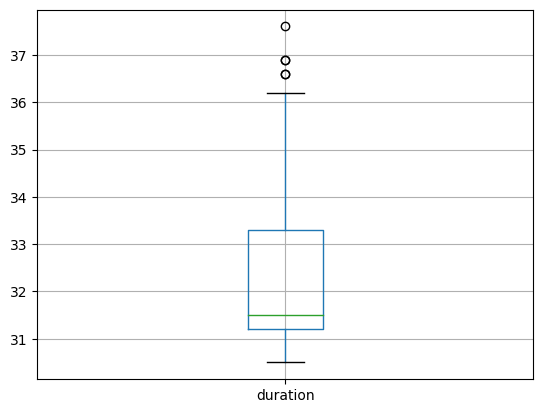

In [6]:
duration = to_plot.groupby(['key'])[['duration']].last()
print("DURATION \t MAX {}b \t-\tMIN {}".format(duration.max().values,duration.min().values))
ax = to_plot.groupby(['key'])[['duration']].last().boxplot()
plt.show()

In [7]:
duration.mean()[0]

32.33841059602648

### total_veh_inseridos

In [8]:
total_veh_inseridos = len(duration)
total_veh_inseridos

151

### qtd_veiculos_finalizam_execucao

In [9]:
total_veh_inseridos - len(intelligent_intersection.topology.keys())

99

### qtd_colisoes

In [10]:
len(pd.DataFrame(intelligent_intersection.dic_colisoes))

0

# Com PELOTÕES

In [11]:
intelligent_intersection = Intelligent_Intersection_DynamicPlatoons(NUM_VEH_PLATOON=NUM_VEH_PLATOON,seed = SEED,
                                                                        ADD_PLATOON_STEP = ADD_PLATOON_STEP,
                                                                       ADD_PLATOON_PRO=ADD_PLATOON_PRO,
                                                                   BLOCKING_ZONE=BLOCKING_ZONE)
intelligent_intersection.start(sumo_cmd,STEP_TOTAL)

 Retrying in 1 seconds
***Starting server on port 42435 ***
Loading net-file from '../02_src/01_scenario/3_intelligent_intersection/set/twoWay6lanes.net.xml' ... done (3ms).
Loading done.
Simulation version 1.18.0 started with time: 0.00.
Step #89.00 (0ms ?*RT. ?UPS, TraCI: 0ms, vehicles TOT 162 ACT 53 BUF 0)                   tep #45.00 (1ms ~= 10.00*RT, ~57000.00UPS, TraCI: 0ms, vehicles TOT 78 ACT 57 BUF 0)     

In [12]:
df = intelligent_intersection.veh_data.merge_veh_data()
df.head()

,step,key,route,odometry,speed,timeLoss,current_time,desired_speed,distance_to_stop_line,max_leaving_time,leaving_time,duration
0,1,v.0.0.0,0,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
1,1,v.0.4.0,4,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
2,1,v.0.6.0,6,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
3,1,v.0.8.0,8,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0
4,1,v.0.11.0,11,0.0,5.0,0.0,0.02,NaN,NaN,NaN,NaN,0.0


In [13]:
# Coleta de todos os veículos que ja ultrapassaram o semáforo
lista_veiculos_apos_semaforo = list(set(df.groupby(['key'])['key'].count().index) - set(intelligent_intersection.topology.keys()))

to_plot = df.query("key in "+str(lista_veiculos_apos_semaforo))

### tempo_medio_viagem

DURATION 	 MAX [36.5]b 	-	MIN [27.3]


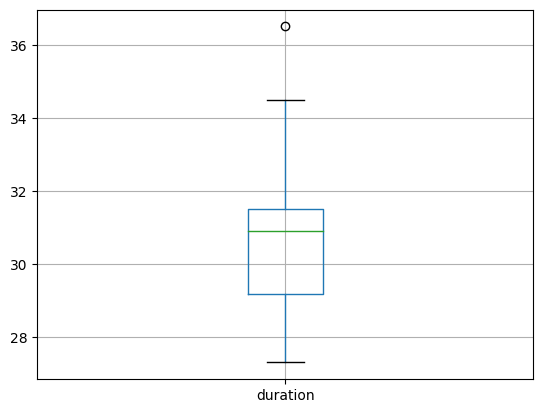

In [14]:
duration = to_plot.groupby(['key'])[['duration']].last()
print("DURATION \t MAX {}b \t-\tMIN {}".format(duration.max().values,duration.min().values))
ax = to_plot.groupby(['key'])[['duration']].last().boxplot()
plt.show()

In [15]:
duration.mean()[0]

30.714102564102568

### total_veh_inseridos

In [16]:
total_veh_inseridos = len(duration)
total_veh_inseridos

156

### qtd_veiculos_finalizam_execucao

In [17]:
total_veh_inseridos - len(intelligent_intersection.topology.keys())

109

### qtd_colisoes

In [18]:
len(pd.DataFrame(intelligent_intersection.dic_colisoes))

0